In [1]:
import numpy as np
import pandas as pd 


from deepymod.DeepMoD import DeepMoD
from deepymod.library_functions import library_1D
from deepymod.utilities import library_matrix_mat, print_PDE, tensorboard_to_dataframe

import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

np.random.seed(42)  # setting seed for randomisation

In [60]:
event_path = 'output/27_b_seed_41_5000/20190810_205510/iteration_0/events.out.tfevents.1565463312.Remys-MacBook-Pro-2.local'
df_tb = tensorboard_to_dataframe(event_path)

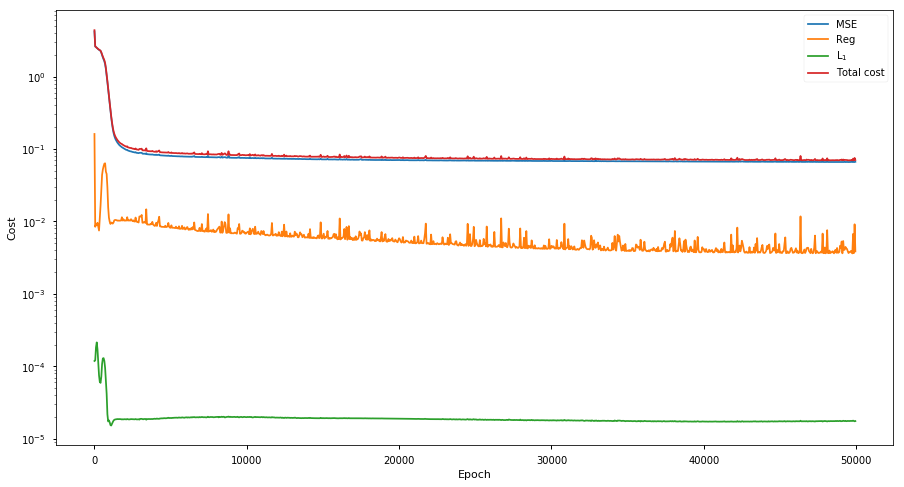

In [61]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(15, 8.0))

ax1.semilogy(df_tb['epoch'], df_tb['MSE_cost_0'], label='MSE')
ax1.semilogy(df_tb['epoch'], df_tb['PI_cost_0'], label='Reg')
ax1.semilogy(df_tb['epoch'], df_tb['L1_cost_0'], label=r'L$_1$')
ax1.semilogy(df_tb['epoch'], df_tb['Total_cost_1'], label='Total cost')
ax1.set(ylabel='Cost')
ax1.set_xlabel('Epoch')
ax1.legend(loc='best')

plt.show()

In [62]:
coeffs = []
for coeff_vec in np.array(df_tb['coeffs_scaled'].values):
        coeffs.append(np.expand_dims(coeff_vec, axis=1))
coeffs = np.array(coeffs).squeeze()

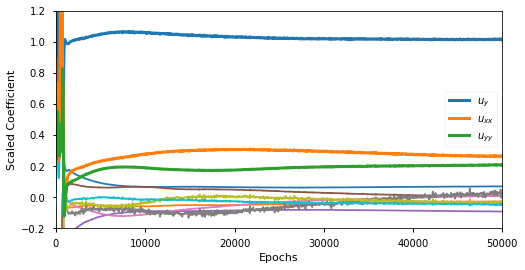

In [69]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(8, 4.0))

for i in np.arange(12):
    if i != 2 and i != 5:
        ax1.plot(df_tb['epoch'], coeffs[:, i])

ax1.plot(df_tb['epoch'], coeffs[:, 2], linewidth=3.0, linestyle='-', label=r'$u_{y}$')
ax1.plot(df_tb['epoch'], coeffs[:, 3], linewidth=3.0, linestyle='-', label=r'$u_{xx}$')
ax1.plot(df_tb['epoch'], coeffs[:, 4], linewidth=3.0, linestyle='-', label=r'$u_{yy}$')
ax1.set_ylim(-0.2,1.2)
ax1.set_xlim(0,50000)
ax1.set(xlabel=r'Epochs', ylabel='Scaled Coefficient')
ax1.legend()

plt.savefig('Advectio_diffusion_.pdf', bbox_inches='tight')

plt.show()

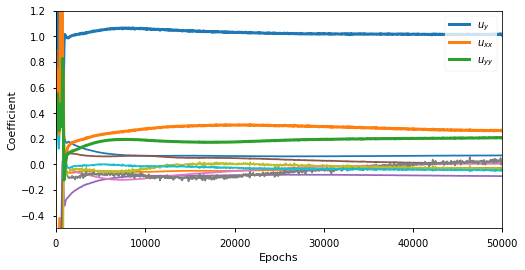

In [54]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(8, 4.0))

for i in np.arange(12):
    if i != 2 and i != 5:
        ax1.plot(df_tb['epoch'], coeffs[:, i])

ax1.plot(df_tb['epoch'], coeffs[:, 2], linewidth=3.0, linestyle='-', label=r'$u_{y}$')
ax1.plot(df_tb['epoch'], coeffs[:, 3], linewidth=3.0, linestyle='-', label=r'$u_{xx}$')
ax1.plot(df_tb['epoch'], coeffs[:, 4], linewidth=3.0, linestyle='-', label=r'$u_{yy}$')
ax1.set_ylim(-0.5,1.2)
ax1.set_xlim(0,50000)
ax1.set(xlabel=r'Epochs', ylabel='Coefficient')
ax1.legend()

plt.show()

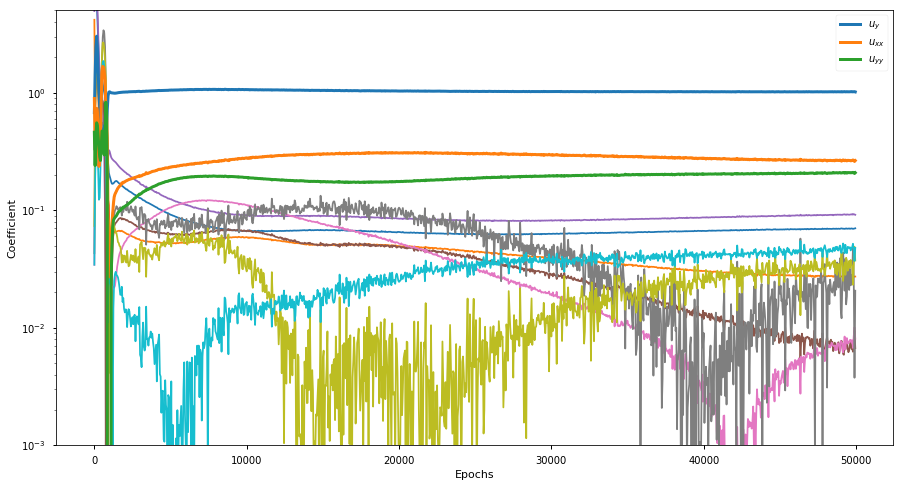

In [37]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(15, 8.0))

for i in np.arange(12):
    if i != 2 and i != 5:
        ax1.semilogy(df_tb['epoch'], np.abs(coeffs[:, i]))

ax1.semilogy(df_tb['epoch'], coeffs[:, 2], linewidth=3.0, linestyle='-', label=r'$u_{y}$')
ax1.semilogy(df_tb['epoch'], coeffs[:, 3], linewidth=3.0, linestyle='-', label=r'$u_{xx}$')
ax1.semilogy(df_tb['epoch'], coeffs[:, 4], linewidth=3.0, linestyle='-', label=r'$u_{yy}$')
ax1.set_ylim(10**(-3),5)
ax1.set(xlabel=r'Epochs', ylabel='Coefficient')
ax1.legend()

plt.show()


In [38]:
event_path = 'output/27_b_seed_41_5000/20190810_205510/iteration_1/events.out.tfevents.1565465197.Remys-MacBook-Pro-2.local'
df_tb = tensorboard_to_dataframe(event_path)

In [39]:
coeffs = []
for coeff_vec in np.array(df_tb['coeffs_scaled'].values):
        coeffs.append(np.expand_dims(coeff_vec, axis=1))
coeffs = np.array(coeffs).squeeze()

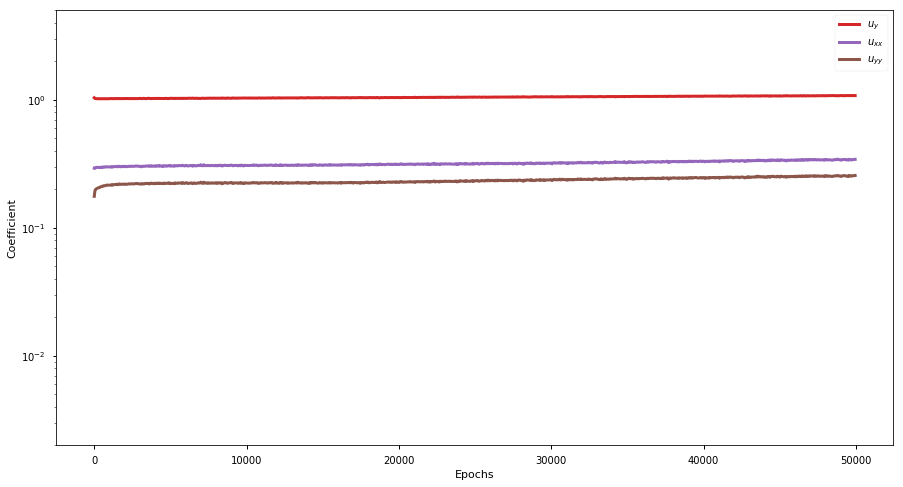

In [40]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(15, 8.0))

for i in np.arange(3):
        ax1.semilogy(df_tb['epoch'], np.abs(coeffs[:, i]))

ax1.semilogy(df_tb['epoch'], np.abs(coeffs[:, 0]), linewidth=3.0, linestyle='-', label=r'$u_{y}$')
ax1.semilogy(df_tb['epoch'], np.abs(coeffs[:, 1]), linewidth=3.0, linestyle='-', label=r'$u_{xx}$')
ax1.semilogy(df_tb['epoch'], np.abs(coeffs[:, 2]), linewidth=3.0, linestyle='-', label=r'$u_{yy}$')
ax1.set_ylim(2*10**(-3),5)
ax1.set(xlabel=r'Epochs', ylabel='Coefficient')
ax1.legend()

plt.show()
